In [ ]:
# drive'a baglanma
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from sklearn.utils import shuffle
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
import cv2
import seaborn as sns
import random
import numpy as np
from sklearn.svm import SVC

In [ ]:
%cd '/content/drive/MyDrive/bt_kanser'

/content/drive/MyDrive/bt_kanser


In [ ]:
!pwd

/content/drive/MyDrive/bt_kanser


## Data Augmentation

In [ ]:
#generator1 = ImageDataGenerator(brightness_range=[0.5, 1])

In [ ]:
# 338     3     1250
# 187     6
# 223     5
# 260     4

In [ ]:
#count_aug={"adenocarcinoma": 3, "large.cell.carcinoma":6, "normal":5, "squamous.cell.carcinoma":4}

In [ ]:
def histeq(img, num_gl):
    """Computes a histogram equalization transform of the input image.

    Args:
        img: MxN numpy array of int. Input image that is to be transformed.
        num_gl: int. Number of graylevels in input image.

    Returns:
        trans_img: MxN numpy array of int. Histogram equalized image.
    """

    N=img.shape[0]
    M=img.shape[1]

    norm_hist = np.array([np.sum(img == g) for g in range(num_gl)])/(N*M)
    cumul_hist = np.array([np.sum(norm_hist[:g+1]) for g in range(num_gl)])

    transform = np.round((num_gl - 1)*cumul_hist).astype(int)
    trans_img = transform[img]

    return trans_img, transform

In [ ]:
"""directory = '/content/drive/MyDrive/bt_kanser/data/'
for label in os.listdir(directory):
  paths=[]
  for i in os.listdir(directory + label):
    img = keras.preprocessing.image.load_img(directory + label + "/" + i, target_size= (512,512))
    img_tensor = keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    pic=generator1.flow(img_tensor, batch_size =1)

    img2 = cv2.imread(directory + label + "/" + i, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, dsize=(512, 512))

    for j in range(0,count_aug[label]):
      if j==0:
        image2,_=histeq(img2, 256)
        image2 = image2.astype("uint8")
      else:
        batch = pic.next()
        image2 = batch[0].astype("uint8")
      im = Image.fromarray(image2)
      im.save(directory + label + "/" + i[:-4] + "_aug"+ str(j)+ ".png")"""

'directory = \'/content/drive/MyDrive/bt_kanser/data/\'\nfor label in os.listdir(directory):\n  paths=[]\n  for i in os.listdir(directory + label):\n    img = keras.preprocessing.image.load_img(directory + label + "/" + i, target_size= (512,512))\n    img_tensor = keras.preprocessing.image.img_to_array(img)\n    img_tensor = np.expand_dims(img_tensor, axis=0)\n    pic=generator1.flow(img_tensor, batch_size =1)\n\n    img2 = cv2.imread(directory + label + "/" + i, cv2.IMREAD_GRAYSCALE)\n    img2 = cv2.resize(img2, dsize=(512, 512))\n\n    for j in range(0,count_aug[label]):\n      if j==0:\n        image2,_=histeq(img2, 256)\n        image2 = image2.astype("uint8")\n      else:\n        batch = pic.next()\n        image2 = batch[0].astype("uint8")\n      im = Image.fromarray(image2)\n      im.save(directory + label + "/" + i[:-4] + "_aug"+ str(j)+ ".png")'

In [ ]:
#Veri setinin sınıflara göre dağılımı
directory="/content/drive/MyDrive/bt_kanser/data/"

j=0
for label in os.listdir(directory):
  k=0
  for i in os.listdir(directory + label):
    k+=1
    j+=1
  print(label,': ',str(k))

print('Toplam görsel sayısı: ',str(j))

normal :  1338
large.cell.carcinoma :  1309
adenocarcinoma :  1352
squamous.cell.carcinoma :  1300
Toplam görsel sayısı:  5299


Veri Setini Train-Test Olarak Ayırma (%80-%20)

In [ ]:
"""os.makedirs(r"data2")

os.makedirs(r"/content/drive/MyDrive/bt_kanser/data2/train")
os.makedirs(r"/content/drive/MyDrive/bt_kanser/data2/test")

directory = '/content/drive/MyDrive/bt_kanser/data/'
for label in os.listdir(directory):
  paths=[]
  os.makedirs(r"/content/drive/MyDrive/bt_kanser/data2/test/" + label)
  os.makedirs(r"/content/drive/MyDrive/bt_kanser/data2/train/" + label)

  for i in os.listdir(directory + label):
    paths.append(directory + label + "/" + i)
  paths = shuffle(paths, random_state=0)

  test_paths=paths[:round(len(paths)* 0.2)]
  for j in test_paths:
    shutil.copy(j,r"/content/drive/MyDrive/bt_kanser/data2/test/"+ label)

  train_paths=paths[round(len(paths)* 0.2):]
  for j in train_paths:
    shutil.copy(j,r"/content/drive/MyDrive/bt_kanser/data2/train/"+ label)"""

Train ve test verilerinin boyutu

In [ ]:
#Test
directory="/content/drive/MyDrive/bt_kanser/data2/test/"

j=0
for label in os.listdir(directory):
  k=0
  for i in os.listdir(directory + label):
    k+=1
    j+=1
  print(label,': ',str(k))

print('Toplam görsel sayısı: ',str(j))

adenocarcinoma :  270
large.cell.carcinoma :  262
normal :  268
squamous.cell.carcinoma :  260
Toplam görsel sayısı:  1060


In [ ]:
#Train
directory="/content/drive/MyDrive/bt_kanser/data2/train/"

j=0
for label in os.listdir(directory):
  k=0
  for i in os.listdir(directory + label):
    k+=1
    j+=1
  print(label,': ',str(k))

print('Toplam görsel sayısı: ',str(j))

adenocarcinoma :  1082
large.cell.carcinoma :  1047
normal :  1070
squamous.cell.carcinoma :  1040
Toplam görsel sayısı:  4239


In [ ]:
#Train setindaki image'lerin path'lerini ve path'lerinden aldigimiz label'larini iki ayrı listeye atama
test_directory="/content/drive/MyDrive/bt_kanser/data2/test/"
train_directory="/content/drive/MyDrive/bt_kanser/data2/train/"

train_paths=[]
train_labels=[]
labels_dict={"adenocarcinoma":0, "large.cell.carcinoma":1, "normal":2, "squamous.cell.carcinoma":3}
key_list = list(labels_dict.keys())
val_list = list(labels_dict.values())

for label in os.listdir(train_directory):
  for i in os.listdir(train_directory + label):
    train_paths.append(train_directory + label + "/" + i)
    train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels, random_state=0)

In [ ]:
#Test setindaki image'lerin path'lerini ve path'lerinden aldigimiz label'larini iki ayrı listeye atama
test_paths=[]
test_labels=[]

for label in os.listdir(test_directory):
  for i in os.listdir(test_directory + label):
    test_paths.append(test_directory + label + "/" + i)
    test_labels.append(label)

test_paths, test_labels =shuffle(test_paths, test_labels, random_state=0)

In [ ]:
#train_path listesinde bulunan pathlerdeki resimleri matrise cevirme ve listeye atama
train_images=[]

for path in train_paths:
  train_images.append(cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE)/255, (512,512)))

#train_labels listesindeki label'ları numerik olarak ifade etme
for i in range(0,len(train_labels)):
  train_labels[i]=labels_dict[train_labels[i]]

In [ ]:
#test_path listesinde bulunan pathlerdeki resimleri matrise cevirme ve listeye atama
test_images=[]

for path in test_paths:
  test_images.append(cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE)/255, (512,512)))

#test_labels listesindeki label'ları numerik olarak ifade etme
for i in range(0,len(test_labels)):
  test_labels[i]=labels_dict[test_labels[i]]

In [ ]:
#Görüntülerin boyutları
images_shape=(np.array(test_images[0]).shape[1], np.array(test_images[0]).shape[1] , 1)
images_shape

(512, 512, 1)

Veri setinden örnek görüntüler ve etiketleri

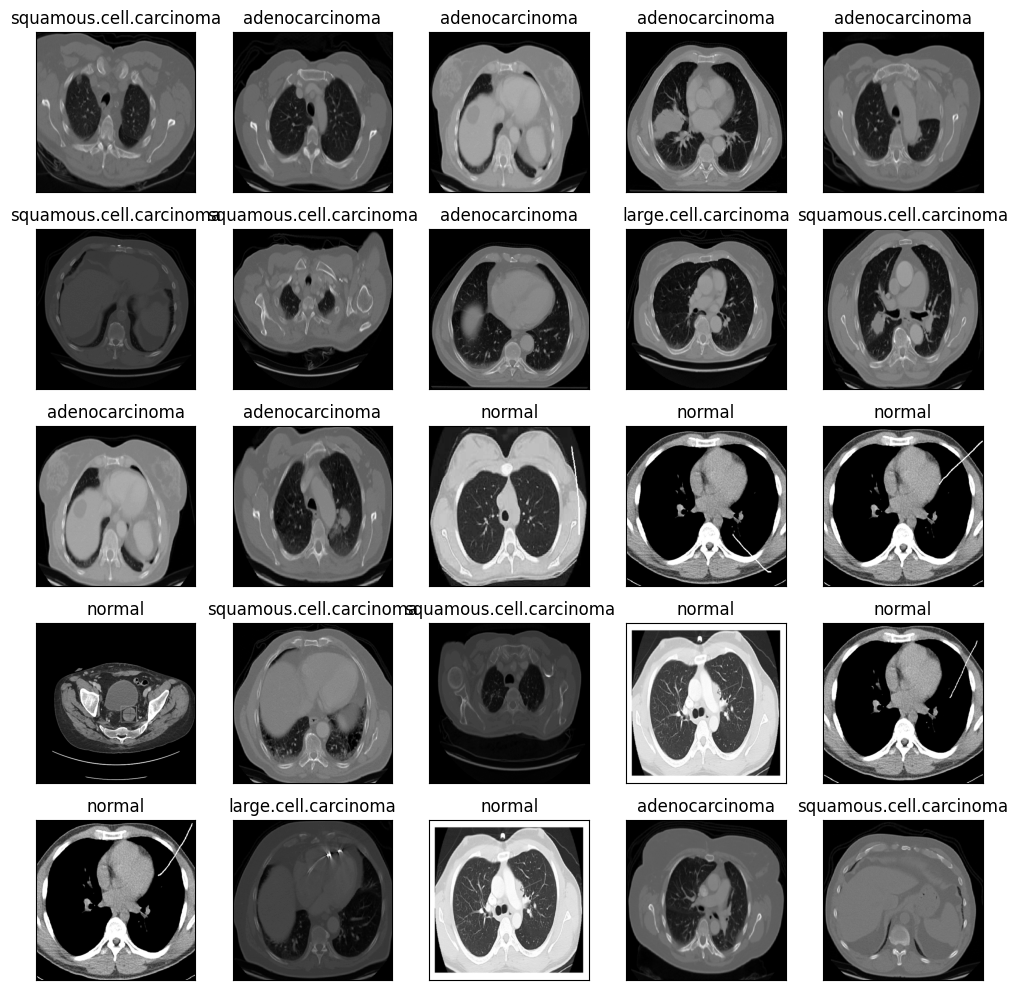

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

for h in range(0,5):
  for w in range(0,5):
    index=random.randint(0,100)
    ax[h][w].imshow(train_images[index],cmap="gray")
    tumor = val_list.index(train_labels[index])
    ax[h][w].set_title(key_list[tumor])

plt.tight_layout()
plt.show()

## Model Oluşturma

### CNN

In [ ]:
model = Sequential()

# Konvolüsyon Katmanı 1
model.add(Conv2D(32,(30,30), input_shape=(512, 512,1), padding='same', activation='relu'))
# Havuzlama Katmanı 1
model.add(MaxPooling2D(pool_size=(15,15)))

#Konvolüsyon Katmanı 2
model.add(Conv2D(32,(15,15), padding='same', activation='relu'))
# Havuzlama Katmanı 2
model.add(MaxPooling2D(pool_size=(7,7)))

# Flatten katmanı
model.add(Flatten())

# Fully connected katmanı
model.add(Dense(units= 30, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics= ['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      28832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 34, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 32)        230432    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 30)                1

#### Eğitim

In [ ]:
train_labels2 = to_categorical(np.array(train_labels), num_classes=4)
test_labels2 = to_categorical(np.array(test_labels), num_classes=4)
train_labels2 = np.array(train_labels2)
test_labels2 = np.array(test_labels2)

train_images2 = np.array(train_images)
test_images2 = np.array(test_images)

In [ ]:
validation_tuple=(train_images2[round(len(train_images)*0.8):], train_labels2[round(len(train_images)*0.8):])

In [ ]:
modelcheckpoint = ModelCheckpoint(filepath = '/content/drive/MyDrive/bt_kanser/model_weights_3.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

Validasyon step değişecek

In [ ]:
output = model.fit(x=train_images2[:round(len(train_images)*0.8)], y=train_labels2[:round(len(train_images)*0.8)], steps_per_epoch=1000, epochs=2, validation_data = validation_tuple, validation_steps= 848//64, callbacks=[modelcheckpoint])

Epoch 1/2
1000/1000 [==============================] - ETA: 0s - loss: 0.0475 - categorical_accuracy: 0.9912
Epoch 1: val_categorical_accuracy improved from -inf to 0.99882, saving model to /content/drive/MyDrive/bt_kanser/model_weights_3.h5
1000/1000 [==============================] - 3990s 4s/step - loss: 0.0475 - categorical_accuracy: 0.9912 - val_loss: 0.0284 - val_categorical_accuracy: 0.9988
Epoch 2/2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 696/1000 [===================>..........] - ETA: 20:10 - loss: 0.0316 - categorical_accuracy: 0.9986


Epoch 2: val_categorical_accuracy did not improve from 0.99882
1000/1000 [==============================] - 2782s 3s/step - loss: 0.0316 - categorical_accuracy: 0.9986 - val_loss: 0.2719 - val_categorical_accuracy: 0.8986


In [ ]:
##output = model.fit(x=train_images2[:round(len(train_images)*0.8)], y=train_labels2[:round(len(train_images)*0.8)], steps_per_epoch=2000, epochs=60, validation_data = validation_tuple, validation_steps= 848//64, callbacks=[modelcheckpoint])

In [ ]:
model.load_weights('/content/drive/MyDrive/bt_kanser/model_weights_2.h5')

In [ ]:
output = model.predict()

#### Accuracy ve Loss Grafikleri

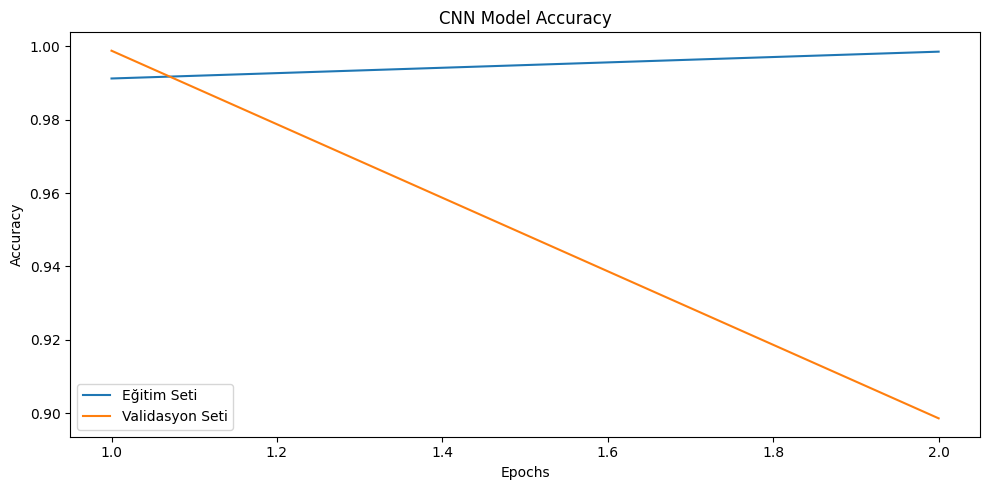

In [ ]:
accuracy = output.history['categorical_accuracy']
val_accuracy = output.history['val_categorical_accuracy']
loss = output.history['loss']
val_loss = output.history['val_loss']
epochs_list = range(1, len(output.epoch) + 1)

plt.figure(figsize=(10,5))

plt.plot(epochs_list, accuracy, label='Eğitim Seti')
plt.plot(epochs_list, val_accuracy, label='Validasyon Seti')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')

plt.tight_layout()
plt.show()

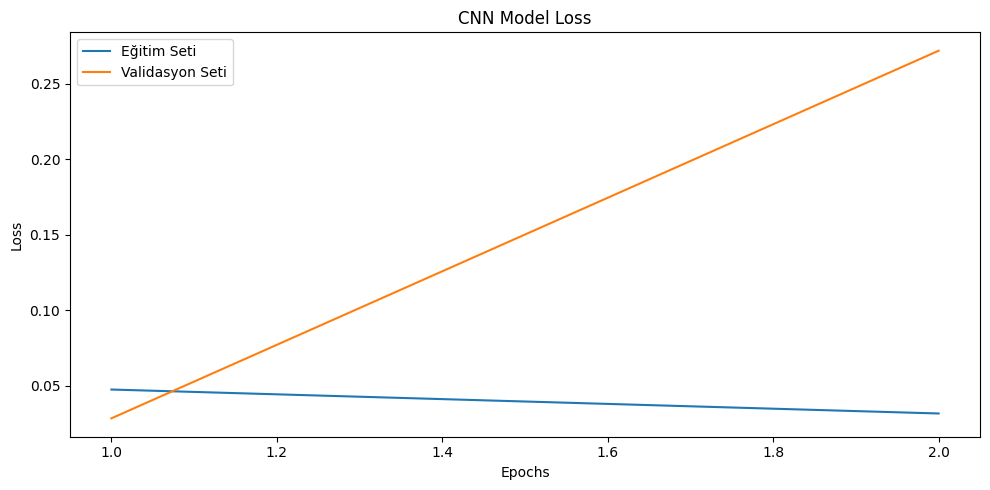

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(epochs_list, loss, label='Eğitim Seti')
plt.plot(epochs_list, val_loss, label='Validasyon Seti')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Model Loss')

plt.tight_layout()
plt.show()

### SVM

In [ ]:
model_feat = Model(inputs=model.input,outputs=model.layers[-2].output)

feat_train = model_feat.predict(train_images2[:round(len(train_images)*0.8)])
print(feat_train.shape)

feat_val = model_feat.predict(train_images2[round(len(train_images)*0.8):])
print(feat_val.shape)

feat_test = model_feat.predict(test_images2)
print(feat_test.shape)

106/106 [==============================] - 45s 417ms/step
(3391, 30)
27/27 [==============================] - 11s 408ms/step
(848, 30)
34/34 [==============================] - 14s 411ms/step
(1060, 30)


#### Eğitim

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(feat_train, np.argmax(train_labels2[:round(len(train_images)*0.8)], axis=1))

SVC()

In [ ]:
svm.score(feat_train, np.argmax(train_labels2[:round(len(train_images)*0.8)],axis=1))

0.9946918313181953

In [ ]:
svm.score(feat_val, np.argmax(train_labels2[round(len(train_images)*0.8):],axis=1))

0.9882075471698113

In [ ]:
svm.score(feat_test, np.argmax(test_labels2,axis=1))

0.9830188679245283

## Model Tahmini

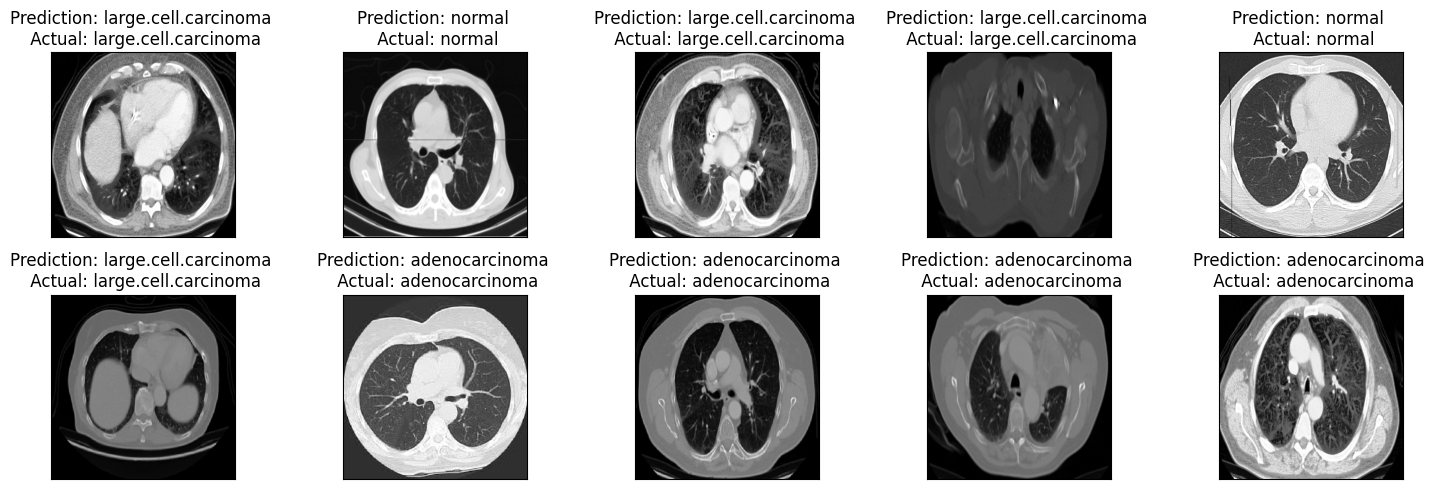

In [ ]:
#Bazı test verileri için modelin tahmin sonuçlarıyla label'ının karşılaştırılması ve çizilmesi
fig, ax = plt.subplots(2,5, figsize=(15, 5), subplot_kw={'xticks': [], 'yticks': []})
label_list=[]

for h in range(0,2):
  for w in range(0,5):
    index=random.randint(0,100)
    ax[h][w].imshow(test_images[index],cmap="gray")
    tumor = val_list.index(test_labels[index])
    label_list.append(key_list[tumor])
    pred2 = svm.predict([feat_test[index]])
    tumor2 = val_list.index(pred2)
    ax[h][w].set_title(f"Prediction: {key_list[tumor2]} \n Actual: {key_list[test_labels[index]]}")

plt.tight_layout()
plt.show()

## Model Değerlendirmesi

### Presicion, Recall ve F1 Score Hesabı

In [ ]:
pred = svm.predict(feat_test)

print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       270
           1       0.98      1.00      0.99       262
           2       1.00      1.00      1.00       268
           3       0.97      0.98      0.98       260

    accuracy                           0.98      1060
   macro avg       0.98      0.98      0.98      1060
weighted avg       0.98      0.98      0.98      1060



### Confusion Matrix

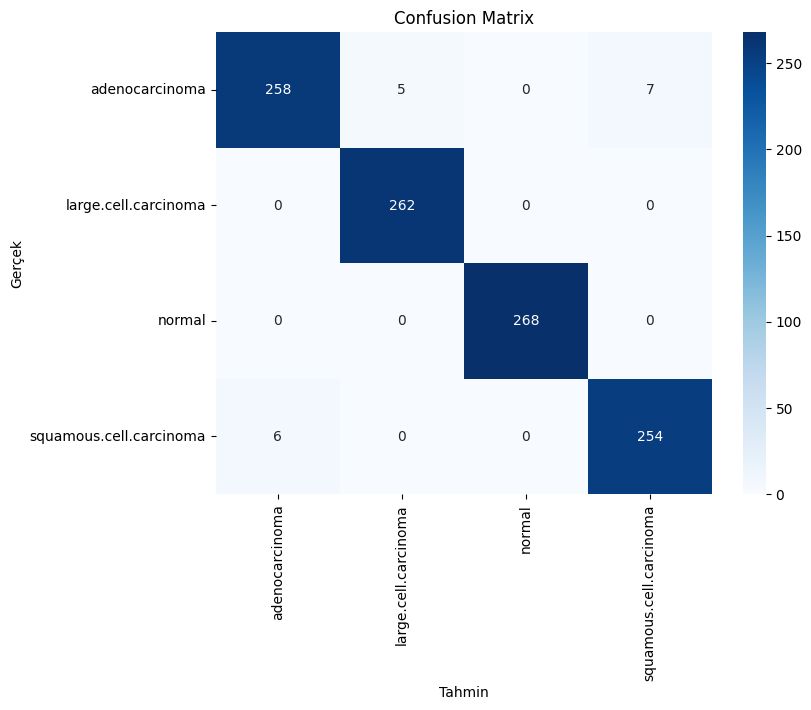

In [ ]:
conf_matrix = confusion_matrix(test_labels, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=key_list, yticklabels=key_list)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()